In [129]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [130]:
X,y = make_classification(n_features=5, n_informative=5, n_redundant=0, n_clusters_per_class=1)

In [131]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.666900,1.838540,-0.285949,2.657517,1.374992,0
1,-0.215158,-1.484109,1.637866,-0.717124,-1.515607,0
2,0.853590,0.336647,0.364159,0.829192,-0.501622,0
3,1.685986,1.767854,2.053021,0.358170,-1.402969,0
4,-0.075864,1.858363,-0.239640,0.635811,-0.580276,1


In [132]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [133]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  return df[cols]

In [134]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)
     

In [135]:
df1 = sample_rows(df,0.15)

In [136]:
df2 = sample_rows(df,0.15)

In [137]:
df3 = sample_rows(df,0.15)

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [140]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.6, 0.875, 'x[1] <= 1.947\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.4, 0.625, 'x[4] <= -2.568\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.375, 'x[0] <= -0.984\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7, 0.75, '  False')]

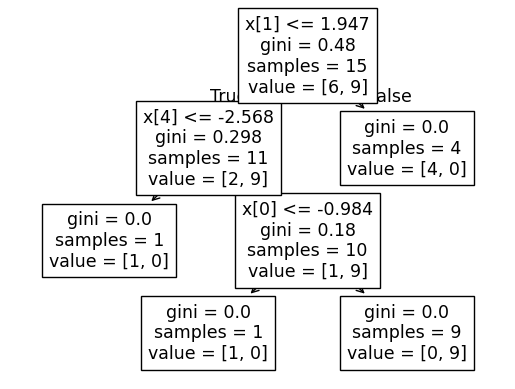

In [141]:
from sklearn.tree import plot_tree
plot_tree(clf1)


[Text(0.6666666666666666, 0.875, 'x[3] <= 1.908\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.5, 0.625, 'x[3] <= 0.634\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[0] <= -0.036\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.75, '  False')]

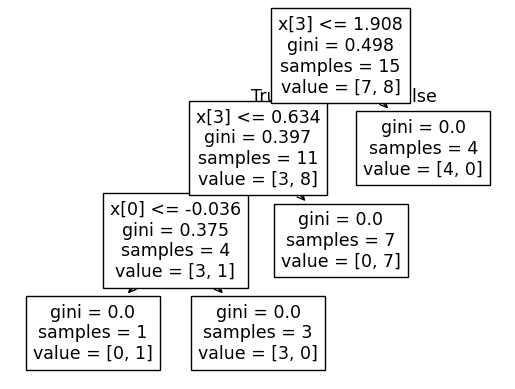

In [142]:
plot_tree(clf2)

[Text(0.5, 0.9, 'x[3] <= 1.766\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.3333333333333333, 0.7, 'x[3] <= -0.243\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.41666666666666663, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.5, 'x[0] <= -0.861\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.3, 'x[2] <= -0.576\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5833333333333333, 0.8, '  False')]

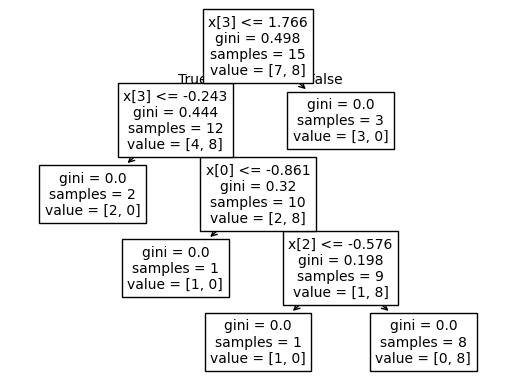

In [143]:
plot_tree(clf3)

In [144]:
clf1.predict(np.array([2.634054,	-0.085767,	3.111848,	2.350903,	-1.379213]).reshape(1,5))

C:\Users\Nikhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [145]:
clf2.predict(np.array([2.634054,	-0.085767,	3.111848,	2.350903,	-1.379213]).reshape(1,5))

C:\Users\Nikhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [146]:
clf3.predict(np.array([2.634054,	-0.085767,	3.111848,	2.350903,	-1.379213]).reshape(1,5))

C:\Users\Nikhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])